**` 들어가기 전, 본 파일은 타이타닉 데이터 셋을 활용하여 전처리 및 예측을 해보는 연습을 하는 것으로서 현재 통계적 지식이 부족하고 머신러닝 기법적인 지식이 없으므로 결측치 처리 및 모델 사용에 있어서 다소 부족할 수 있으며 pandas, matplot, seaborn 에 대해 한번 정독후 바로 시작한 입문자의 미니 프로젝트로서 봐주면 될 것 같습니다,    ★★어떠한 조언 및 지적 좋게 받겠습니다 *^^* ★★ `**

# 1. 구글 드라이브 연동 및 데이터 불러오기

In [625]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# kaggle 사이트에서  다운을 받은후 구글드라이브에 저장하고 불러오는 방식
train = pd.read_csv('/content/Mydrive/MyDrive/datascience/train.csv')
test = pd.read_csv('/content/Mydrive/MyDrive/datascience/test.csv')

# seaborn에서 데이터 셋 불러오는 방식
# titanic = sns.load_dataset('titanic')

# 2. 데이터 확인하기 

## 1) 데이터 형태 확인

In [627]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [628]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [629]:
# pclass를 보면 3등급인 승객이 가장 많다고 생각해 볼 수 있다.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [630]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [631]:
# Age 와 Cabin 그리고 Embarked 이렇게 세개의 데이터에 nan값이 있다는 것을 알 수 있따.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [632]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 2) 전처리 이전 데이터 셋의 시각화

#### a. 성별에 따른 생존 비교

* 여성이 남성보다 생존을 하기에 유리했다.


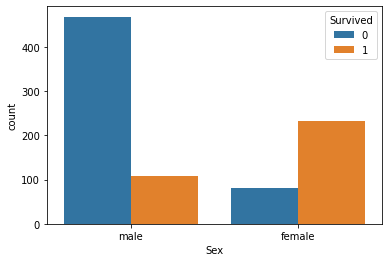

In [633]:
pre_sex = sns.countplot(data= train, x = 'Sex', hue = 'Survived')
pre_sex

#### b. 티켓 등급에 따른 생존 비교

* 1등급이 가장 많이 생존했으며 가장 적은 승객이 죽었다

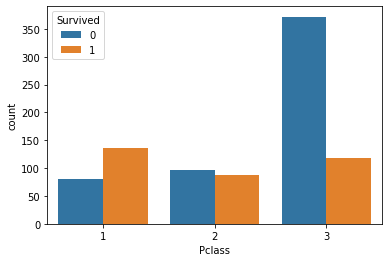

In [634]:
pre_pclass = sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
pre_pclass

#### c. 나이에 따른 생존 비교

* 나이는 추가적인 전처리가 필요할것 같다. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text major ticklabel objects>)

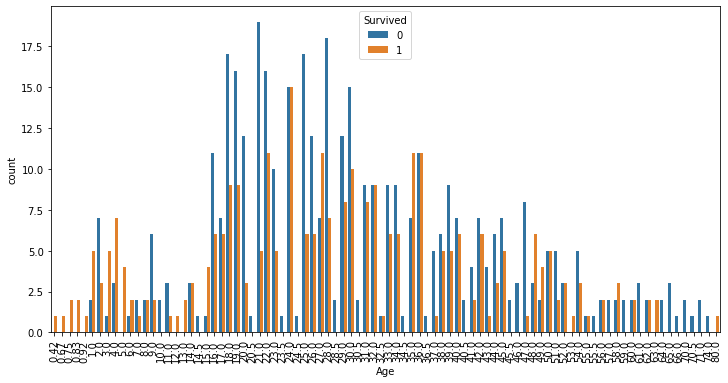

In [635]:
plt.figure(figsize = (12, 6))
pre_age = sns.countplot(data = train, x = 'Age', hue = 'Survived')
pre_age
plt.xticks(rotation = 90)

# 3. 데이터 전처리 

## Data Cleaning(데이터 정제)

In [636]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### a. Age의 nan값 처리.

 `평균 + 표준편차값을 Age의 nan값에 채워 주기로 했다.`
 
 `why?. 평균의 데이터를 넣기에는 평균 데이터가 
 급격하게 증가하기 때문에 0이나 평균이 아닌 평균+표준편차를 사용 , 또한 이렇게 하게 되면 평균에 대한 값은 크게 변함이 없으면서도 어느정도 범위안에서 고르게 분포가 되기 때문에 최선의 방법이라고 생각`

In [637]:
# 평균 + 표준편차값을 Age의 nan값에 채워 주기로 했다.
# why?. 평균의 데이터를 넣기에는 평균치의 데이터가 
# 급격하게 증가하기 때문에 0이나 평균이 아닌 평균+표준편차를 사용 

# train set
age_size = train['Age'].isna().sum()
age_mean = train['Age'].mean()
age_std = train['Age'].std()

# test set
age_size2 = test['Age'].isna().sum()
age_mean2 = test['Age'].mean()
age_std2 = test['Age'].std()







np.random.seed(26)
fill_age = abs(np.random.randn(age_size)) * age_std + age_mean
fill_age

np.random.seed(26)
fill_age2 = abs(np.random.randn(age_size2)) * age_std2 + age_mean2
fill_age2

array([33.0520111 , 57.80166993, 40.39493159, 39.6626518 , 33.51813199,
       34.12634568, 30.68482323, 55.22559243, 41.53644905, 39.10213029,
       32.5322285 , 48.91100365, 43.83346446, 41.5621196 , 43.39323398,
       44.90727486, 38.55915966, 69.21313116, 37.32943258, 59.88452873,
       31.24861356, 34.15310448, 44.02742641, 45.07108987, 50.95386298,
       38.53501411, 39.34211438, 33.3014719 , 34.54893498, 41.7630786 ,
       44.92634186, 46.67296524, 39.35554991, 35.69466532, 57.55470962,
       51.24774673, 46.33430975, 33.01064184, 34.04944228, 40.72956586,
       34.39973329, 36.13606577, 35.73979845, 33.86579993, 38.54364011,
       40.53947757, 31.01663885, 49.62837274, 30.93274885, 42.16211794,
       34.419578  , 35.31076266, 34.23422125, 41.96731949, 30.79330537,
       39.19983372, 31.79772122, 60.22888259, 33.11914652, 31.082056  ,
       43.72640603, 46.31759783, 33.24415151, 62.06379974, 52.33711655,
       38.84373944, 31.9533932 , 46.06639214, 36.2562157 , 56.31

In [638]:
# train
train.loc[train['Age'].isna(), 'Age'] = fill_age
train['Age'].isna().sum()

# test
test.loc[test['Age'].isna(), 'Age'] = fill_age2
test['Age'].isna().sum()

0

In [639]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [640]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### b. Cabin의 nan값 처리

` Cabin의 경우 nan값이 전체 891개의 데이터중 600개가 넘는 데이터가 포함되며 다른 컬럼으로부터 유추가 불가능 하기때문에 컬럼을 삭제 `

In [641]:
train = train.drop('Cabin', axis = 1)
train.info()

test = test.drop('Cabin', axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

#### c. Embarked의 nan값 처리

` 이 데이터의 경우는 mode()를 통해 확인한 결과 최 빈값이 우월한 데이터가 있으며 오직 2개의 데이터가 누락되어 있으므로 가장 많은 데이터 셋으로 넣어준다 `

In [642]:
train['Embarked'].mode()
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [643]:
test['Embarked'].mode()
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [644]:
train['Embarked'] = train['Embarked'].fillna('S')
train.info()
test['Embarked'] = test['Embarked'].fillna('S')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

In [645]:
# test셋의 Fare가 한개의 결측값을 가지고 있고 단, 하나의 데이터 이므로 평균으로 채워주었다.
Fare_mean = test['Fare'].mean()
test['Fare']= test['Fare'].fillna(Fare_mean)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


이렇게 까지 하면 결측값들을 모두 채워둔 상태가 된다. 

이후는 모델에 넣기 위한 인코딩 작업을 해준다던가 중복되는 컬럼을 하나로 합치는 작업 및 필요없는 컬럼 축소 작업이 필요 할 것 같다

#### d. Ticket 컬럼 제거

In [646]:
# 해당 컬럼이 생존률과 연관이 없다고 판단
 
# train
train = train.drop('Ticket', axis =1)

# test
test = test.drop('Ticket', axis = 1)

## 데이터 합치기

#### Sibsp + Parch = Alone


Sibsp 와 Parch는 동승자 에 대한 데이터 이다. 따라서 동승자를 구간으로 나누어 인코딩 처리 하는것 보다 "혼자 탑승, 여럿 탑승" 으로 나누어 훨씬더 비교하기 쉬운 데이터로 만들어 줌. (두 개의 컬럼을 합쳐 새로운 컬럼 Alone으로 만들어준다.) 

In [647]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


먼저 두개의 데이터를 'Alone' 으로 합쳐보겠습니다 

In [648]:
# train
train['Alone'] = train['SibSp'] + train['Parch']
train['Alone']
train.head(10)

# test
test['Alone'] = test['SibSp'] + test['Parch']
test['Alone']
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S,2


In [649]:
# train
train.drop(train[['SibSp','Parch']], axis = 1,inplace=True)

# test
test.drop(test[['SibSp','Parch']], axis =1,inplace=True )

In [650]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,32.546213,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,30.0708,C,1


In [651]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,29.0000,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,7.2292,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,24.1500,S,2


이제는 Alone을 혼자왔으면 0, 혼자가 아니면 1로 바꾸어 보겠습니다

In [652]:
# train
a = []

for i in train['Alone']:
  if i == 0:
    a.append(i)
  elif i != 0:
    a.append(1)

a

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [653]:
# test
b = []

for i in test['Alone']:
  if i == 0:
    b.append(i)
  elif i != 0:
    b.append(1)

b

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


In [654]:
train['Alone'] = train['Alone'] = a
train['Alone'].unique()


array([1, 0])

In [655]:
test['Alone'] = test['Alone'] = b
test['Alone'].unique()


array([0, 1])

In [656]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Alone        891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [657]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Alone        418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


## 인코딩

Age변환

In [658]:
train['Age'] = train['Age'].astype(int)
train['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    51
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [659]:
test['Age'] = test['Age'].astype(int)
test['Age']

0      34
1      47
2      62
3      27
4      22
       ..
413    44
414    39
415    38
416    41
417    48
Name: Age, Length: 418, dtype: int64

Fare 변환 ( 소수점 첫째 자리에서 반올림 후 int형 변환)

In [660]:
# train
train['Fare'] = round(train['Fare'])
train['Fare']
train['Fare'] = train['Fare'].astype(int)
train['Fare']

# test
test['Fare'] = round(test['Fare'])
test['Fare']
test['Fare'] = test['Fare'].astype(int)
test['Fare']

0        8
1        7
2       10
3        9
4       12
      ... 
413      8
414    109
415      7
416      8
417     22
Name: Fare, Length: 418, dtype: int64

In [661]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 62.8+ KB


In [662]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 26.2+ KB


Name 변환 ( .(온점)앞의 이름으로 통일)

In [663]:
Name = []

for i in train['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name.append(h[:-1])

Name

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [664]:
Name_test = []

for i in test['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name_test.append(h[:-1])

Name_test

['Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Master',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Ms',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'M

In [665]:
# train
train['Name'] = pd.Series(Name)
train['Name']

# test
test['Name'] = pd.Series(Name_test)
test['Name']


0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [666]:
# train
train['Name'].unique()

# test
test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

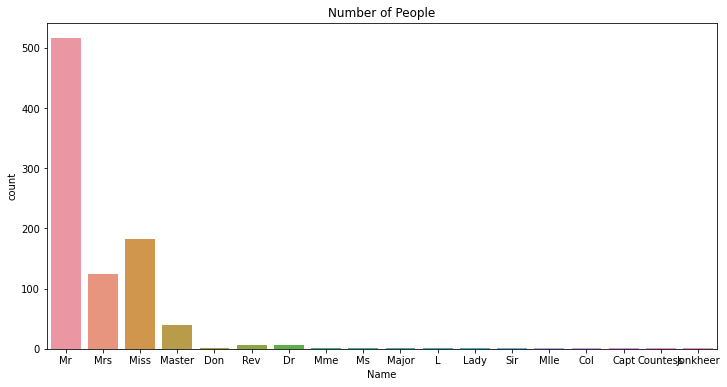

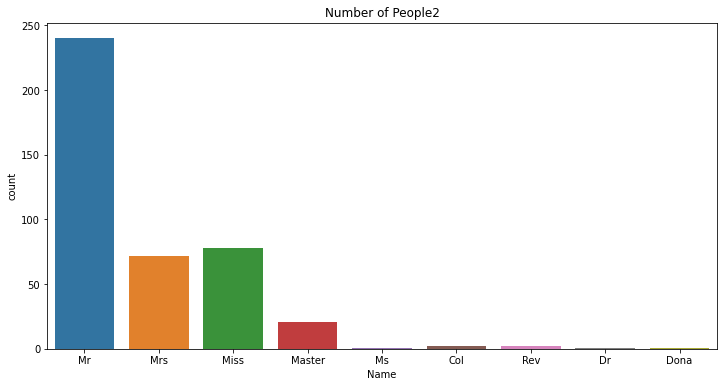

In [667]:
plt.figure(figsize = (12, 6))

sns.countplot(data= train, x = train['Name'])
plt.title('Number of People')

plt.figure(figsize = (12, 6))

sns.countplot(data = train, x = test['Name'])
plt.title('Number of People2')

plt.show()

` name의 구성을 보면 'Mr','Mrs','Miss','Master'가 대부분을 구성하고 나머지 많은 이름들은 극히 일부분이므로 Others로 통합 ` 

In [668]:
# train
train['Name'] = train['Name'].replace([ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Others')
train['Name'].unique()

# test
test['Name'] = test['Name'].replace(['Ms', 'Col', 'Rev', 'Dr', 'Dona'], 'Others')
test['Name'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

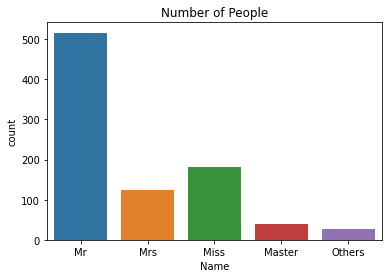

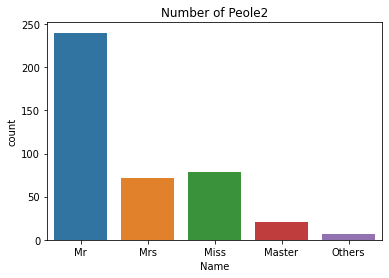

In [669]:
sns.countplot(data= train, x = 'Name')
plt.title('Number of People')

plt.figure()

sns.countplot(data = test, x = 'Name')
plt.title('Number of Peole2')

plt.show()

` 인코딩을 통해 int형 으로 만들어 주기 `

In [670]:
from sklearn.preprocessing import LabelEncoder

` Master : 0 , Miss : 1,  Mr : 2, Mrs : 3  Others : 4`
내가 원하는대로 숫자를 지정해 줄 수 있나?

In [671]:
le = LabelEncoder()

# train
le.fit(train['Name'])
train['Name'] = le.transform(train['Name'])
train.head(10)

# test
le.fit(test['Name'])
test['Name'] = le.transform(test['Name'])
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,male,34,8,Q,0
1,893,3,3,female,47,7,S,1
2,894,2,2,male,62,10,Q,0
3,895,3,2,male,27,9,S,0
4,896,3,3,female,22,12,S,1
5,897,3,2,male,14,9,S,0
6,898,3,1,female,30,8,Q,0
7,899,2,2,male,26,29,S,1
8,900,3,3,female,18,7,C,0
9,901,3,2,male,21,24,S,1


In [672]:
train['Name'].unique()
test['Name'].unique()

array([2, 3, 1, 0, 4])

In [673]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 62.8+ KB


In [674]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 26.2+ KB


'Sex' 변환

In [675]:
# train
train['Sex'] = train['Sex'].map({'male': 0, 'female' : 1})
train['Sex']

# test
test['Sex'] = test['Sex'].map({'male': 0, 'female' : 1})
test['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [676]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [677]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.2+ KB


'Embarked' 변환

In [678]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [679]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [680]:
# train
train.loc[train['Embarked'] == 'S', 'Embarked'].count()

# test
test.loc[test['Embarked'] == 'S', 'Embarked'].count()


270

In [681]:
# train
train.loc[train['Embarked'] == 'C', 'Embarked'].count()

# test
test.loc[test['Embarked'] == 'C', 'Embarked'].count()

102

` Survivded : 0 = 비생존 , 1 = 생존 `

` Embarked : Q = 1 , C = 0 , S = 2 `

` Pclass : 1 = 1등급, 2 = 2등급 , 3 = 3등급`

` Name : 0 = 'Master', 1 = 'Miss', 2 = 'Mr', 
3 =   'Mrs', 4 = 'Others' `

` Sex : 0  = male, 1 = female `

` Alone : 0 = 혼자, 1 = 둘 이상 `

In [682]:
le= LabelEncoder()

# train
le.fit(train['Embarked'])
train['Embarked'] =le.transform(train['Embarked']) 
train.head(10)

# test
le.fit(test['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,0,34,8,1,0
1,893,3,3,1,47,7,2,1
2,894,2,2,0,62,10,1,0
3,895,3,2,0,27,9,2,0
4,896,3,3,1,22,12,2,1
5,897,3,2,0,14,9,2,0
6,898,3,1,1,30,8,1,0
7,899,2,2,0,26,29,2,1
8,900,3,3,1,18,7,0,0
9,901,3,2,0,21,24,2,1


` 'Age' 와 'Fare' 의 인코딩이 필요 `

In [683]:
train['Age'].min()


0

In [684]:
test['Age'].min()

0

In [685]:
train['Age'].max()

80

In [686]:
test['Age'].max()

76

In [687]:
train.loc[train['Age'] == 0 , 'Age']

78     0
305    0
469    0
644    0
755    0
803    0
831    0
Name: Age, dtype: int64

In [688]:
test.loc[train['Age'] == 0 , 'Age']

78     30
305    64
Name: Age, dtype: int64

In [689]:
a = train.loc[train['Age'] == 0 , 'Age']
train.drop(a.index,inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,2,0,22,7,2,1
1,2,1,1,3,1,38,71,0,1
2,3,1,3,1,1,26,8,2,0
3,4,1,1,3,1,35,53,2,1
4,5,0,3,2,0,35,8,2,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,27,13,2,0
887,888,1,1,4,1,19,30,2,0
888,889,0,3,1,1,51,23,2,1
889,890,1,1,1,0,26,30,0,0


In [690]:
b = test.loc[test['Age'] == 0 , 'Age']
test.drop(b.index,inplace=True)
test

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,0,34,8,1,0
1,893,3,3,1,47,7,2,1
2,894,2,2,0,62,10,1,0
3,895,3,2,0,27,9,2,0
4,896,3,3,1,22,12,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,2,0,44,8,2,0
414,1306,1,4,1,39,109,0,0
415,1307,3,2,0,38,7,2,0
416,1308,3,2,0,41,8,2,0


In [691]:
train['Age'].min()

1

In [692]:
test['Age'].min()

1

In [693]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,2,0,22,7,2,1
1,2,1,1,3,1,38,71,0,1
2,3,1,3,1,1,26,8,2,0
3,4,1,1,3,1,35,53,2,1
4,5,0,3,2,0,35,8,2,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,27,13,2,0
887,888,1,1,4,1,19,30,2,0
888,889,0,3,1,1,51,23,2,1
889,890,1,1,1,0,26,30,0,0


In [694]:
test

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,2,0,34,8,1,0
1,893,3,3,1,47,7,2,1
2,894,2,2,0,62,10,1,0
3,895,3,2,0,27,9,2,0
4,896,3,3,1,22,12,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,2,0,44,8,2,0
414,1306,1,4,1,39,109,0,0
415,1307,3,2,0,38,7,2,0
416,1308,3,2,0,41,8,2,0


In [616]:
# train
le.fit(train['Age'])
train['Age'] = le.transform(train['Age'])
train


# # test
# le.fit(test['Age'])
# test['Age'] = le.transform(test['Age'])
# test

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,2,0,1,7,2,1
1,2,1,1,3,1,2,71,0,1
2,3,1,3,1,1,1,8,2,0
3,4,1,1,3,1,2,53,2,1
4,5,0,3,2,0,2,8,2,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,1,13,2,0
887,888,1,1,4,1,1,30,2,0
888,889,0,3,1,1,3,23,2,1
889,890,1,1,1,0,1,30,0,0


In [ ]:
train['Age'].unique()

` 1 = 0.921 ~ 16.8 / 2 = 16.8 ~ 32.6 / 3 = 32.6 ~ 48.4 / 4 = 48.4 ~ 64.2 / 5 = 64.2 ~ 80.0 `





In [617]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  884 non-null    int64
 1   Survived     884 non-null    int64
 2   Pclass       884 non-null    int64
 3   Name         884 non-null    int64
 4   Sex          884 non-null    int64
 5   Age          884 non-null    int64
 6   Fare         884 non-null    int64
 7   Embarked     884 non-null    int64
 8   Alone        884 non-null    int64
dtypes: int64(9)
memory usage: 69.1 KB


In [618]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  413 non-null    int64
 1   Pclass       413 non-null    int64
 2   Name         413 non-null    int64
 3   Sex          413 non-null    int64
 4   Age          413 non-null    int64
 5   Fare         413 non-null    int64
 6   Embarked     413 non-null    int64
 7   Alone        413 non-null    int64
dtypes: int64(8)
memory usage: 29.0 KB
